In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D


df=pd.read_csv('../datasets/datasetFINALE.csv')

In [ ]:
plots_dir = "plots/"

In [2]:
df.head()

,SeniorCitizen,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,ServiceCount,PhoneService
0,No,No,1,DSL,Month-to-month,Yes,Electronic check,29.85,No,1,No phone service
1,No,No,34,DSL,One year,No,Mailed check,56.95,No,2,Single line
2,No,No,2,DSL,Month-to-month,Yes,Mailed check,53.85,Yes,2,Single line
3,No,No,45,DSL,One year,No,Bank transfer (automatic),42.30,No,3,No phone service
4,No,No,2,Fiber optic,Month-to-month,Yes,Electronic check,70.70,Yes,0,Single line


Data Normalization

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df[['tenure','MonthlyCharges','ServiceCount']].values)

In [5]:
target=df.Churn
df=df.drop('Churn',axis=1)

In [13]:
ddf=pd.DataFrame(X,columns=['tenure','MonthlyCharges','ServiceCount'])
ddf[['SeniorCitizen','Dependents','InternetService','Contract','PaperlessBilling','PaymentMethod','PhoneService']]=df[['SeniorCitizen','Dependents','InternetService','Contract','PaperlessBilling','PaymentMethod','PhoneService']]

In [14]:
ddf.head()

,tenure,MonthlyCharges,ServiceCount,SeniorCitizen,Dependents,InternetService,Contract,PaperlessBilling,PaymentMethod,PhoneService
0,0.013889,0.115423,0.166667,No,No,DSL,Month-to-month,Yes,Electronic check,No phone service
1,0.472222,0.385075,0.333333,No,No,DSL,One year,No,Mailed check,Single line
2,0.027778,0.354229,0.333333,No,No,DSL,Month-to-month,Yes,Mailed check,Single line
3,0.625000,0.239303,0.500000,No,No,DSL,One year,No,Bank transfer (automatic),No phone service
4,0.027778,0.521891,0.000000,No,No,Fiber optic,Month-to-month,Yes,Electronic check,Single line


Clustering

In [15]:
from kmodes.kprototypes import KPrototypes as kpro
from sklearn.metrics import silhouette_score

Knee Method to estimate the best K

In [19]:
cost_list = []
sillist=[]
max_k = 30
for k in range(2, max_k + 1):
    kproto = kpro(n_clusters=k, n_init=10,init='Cao', max_iter=100,verbose=1)
    kproto.fit(ddf.values,categorical=[3,4,5,6,7,8,9])
    
    cost = kproto.cost_
    cost_list.append(cost)
    sillist.append(silhouette_score(ddf[['tenure','MonthlyCharges','ServiceCount']].values, kproto.labels_))

List of silhouettes scores

In [20]:
sillist

[0.38453471388154026,
 0.3223400627667136,
 0.22822725623362822,
 0.21329099748160338,
 0.12670065011237874,
 0.1752911639868967,
 0.15234888890742349,
 0.07395363892531662,
 0.05122320121094482,
 0.08397294369115821,
 0.08533543520153918,
 0.0920178851285829,
 0.012276327972436054,
 0.04161420319067243,
 -0.040658566295681355,
 0.02085145948546729,
 0.06057561016900112,
 -0.018522784439598337,
 -0.04656757079621035,
 -0.06265869416377962,
 -0.009024226479094528,
 -0.05536139557123032,
 -0.014303317192397512,
 -0.06213795318021021,
 -0.05776804106912611,
 -0.05358004352135354,
 -0.048207950619800266,
 -0.06914469480166242,
 -0.056049642487275314]

Cost plot

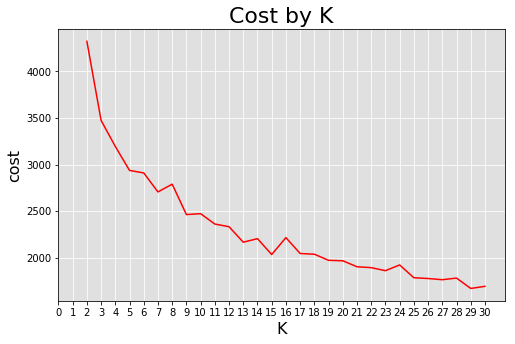

In [21]:
f = plt.figure(figsize=(8,5))
ax = f.add_subplot(1,1,1)

ax.plot(range(2, len(cost_list) + 2), cost_list,color='red')


plt.ylabel('cost', fontsize=16)
plt.xlabel('K', fontsize=16)
plt.xticks(np.arange(0, 31),fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)

plt.savefig(plots_dir+'cost_cluster.png')
plt.show()

Silhouettes w.r.t. K

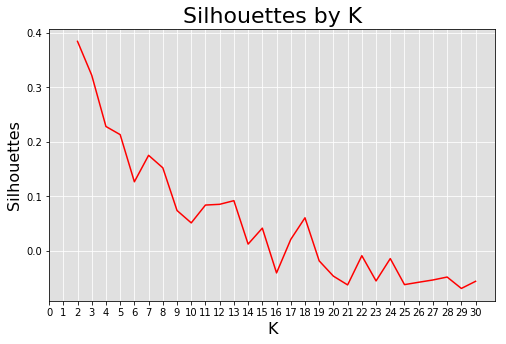

In [22]:
f = plt.figure(figsize=(8,5))
ax = f.add_subplot(1,1,1)

ax.plot(range(2, len(cost_list) + 2), sillist,color='red')

plt.ylabel('Silhouettes', fontsize=16)
plt.xlabel('K', fontsize=16)
plt.xticks(np.arange(0, 31),fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Silhouettes by K', fontsize=22)

plt.savefig(plots_dir+'silouette.png')

In [25]:
kproto = kpro(n_clusters=5, n_init=10, max_iter=100,verbose=1)
kproto.fit(ddf.values,categorical=[3,4,5,6,7,8,9])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2137, ncost: 3060.4558621782026
Run: 1, iteration: 2/100, moves: 328, ncost: 3053.470730566566
Run: 1, iteration: 3/100, moves: 148, ncost: 3051.742887483118
Run: 1, iteration: 4/100, moves: 51, ncost: 3051.5744431047788
Run: 1, iteration: 5/100, moves: 27, ncost: 3051.537175598098
Run: 1, iteration: 6/100, moves: 5, ncost: 3051.5315195361754
Run: 1, iteration: 7/100, moves: 2, ncost: 3051.530845997131
Run: 1, iteration: 8/100, moves: 0, ncost: 3051.530845997131
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 3150, ncost: 3066.853295393307
Run: 2, iteration: 2/100, moves: 512, ncost: 3052.4356499988007
Run: 2, iteration: 3/100, moves: 261, ncost: 3047.9110626777565
Run: 2, iteration: 4/100, moves: 192, ncost: 3045.32448494782
Run: 2, iteration: 5/100, moves: 107, ncost: 3044.5590489818424
Run: 2, iteration: 6/1

KPrototypes(cat_dissim=<function matching_dissim at 0x000001E2BAC10BF8>,
      gamma=0.16070830844470313, init='Huang', max_iter=100, n_clusters=5,
      n_init=10,
      num_dissim=<function euclidean_dissim at 0x000001E2BAC10C80>,
      verbose=1)

In [26]:
print('Silhouette %s' %silhouette_score(X,kproto.labels_))

Silhouette 0.2633129170327884


In [27]:
hist, bins = np.histogram(kproto.labels_, bins=range(0, len(set(kproto.labels_)) + 1))
sizes = dict(zip(bins, hist))

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(X)))

Cluster 0: 1800 (0.26)
Cluster 1: 816 (0.12)
Cluster 2: 1118 (0.16)
Cluster 3: 1683 (0.24)
Cluster 4: 1626 (0.23)


Plotting centroids

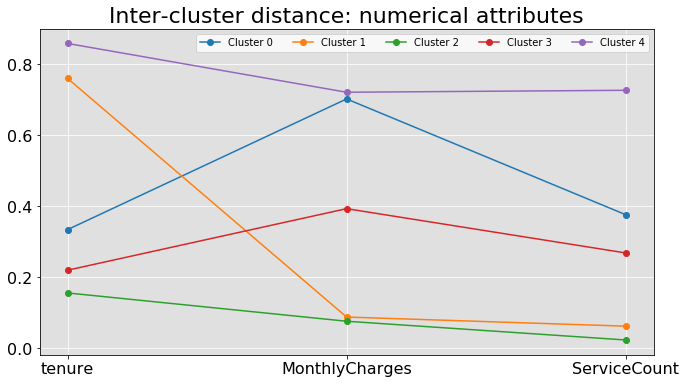

In [46]:
centers = kproto.cluster_centroids_[0]
numerical=['tenure','MonthlyCharges','ServiceCount']

f = plt.figure(figsize=(11,6))
ax = f.add_subplot(1,1,1)

for i in range(0, len(centers)):
    ax.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(range(0, len(numerical)), numerical, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=10, ncol=5, loc='upper right')

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Inter-cluster distance: numerical attributes', fontsize=22)
plt.savefig(plots_dir+'InterClusterDistanceNum.png')
plt.show()

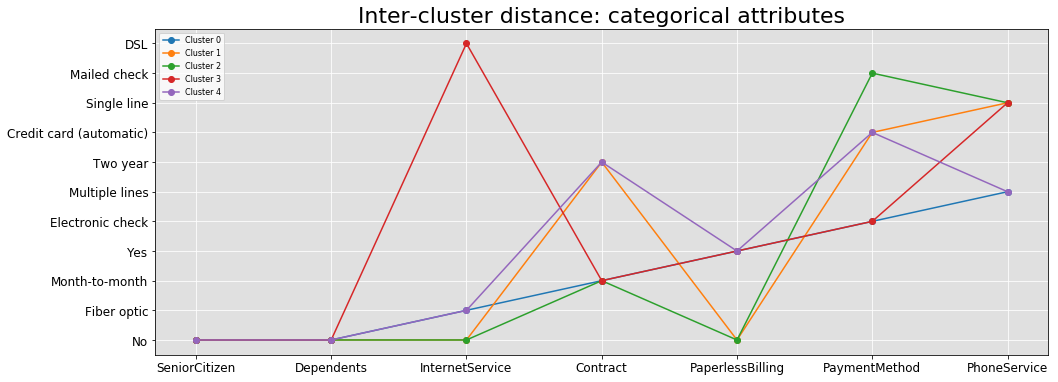

In [29]:
centers = kproto.cluster_centroids_[1]
categorical=['SeniorCitizen','Dependents','InternetService',
             'Contract','PaperlessBilling','PaymentMethod',
             'PhoneService']


f = plt.figure(figsize=(16,6))
ax = f.add_subplot(1,1,1)


for i in range(0, len(centers)):
    ax.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(range(0, len(categorical)), categorical, fontsize=8)
plt.legend(fontsize=8, ncol=1, loc='upper left')
plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')

plt.title('Inter-cluster distance: categorical attributes', fontsize=22)
plt.savefig(plots_dir+'InterClusterDistanceCat.png')
plt.show()

k=7

In [57]:
kproto7 = kpro(n_clusters=7, n_init=10, max_iter=100,verbose=1)
kproto7.fit(ddf.values,categorical=[3,4,5,6,7,8,9])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2009, ncost: 2879.560096673364
Run: 1, iteration: 2/100, moves: 656, ncost: 2815.216640533484
Run: 1, iteration: 3/100, moves: 612, ncost: 2777.990177526052
Run: 1, iteration: 4/100, moves: 388, ncost: 2772.816408385568
Run: 1, iteration: 5/100, moves: 306, ncost: 2766.0021282065427
Run: 1, iteration: 6/100, moves: 330, ncost: 2758.3156341777544
Run: 1, iteration: 7/100, moves: 308, ncost: 2751.639358380616
Run: 1, iteration: 8/100, moves: 325, ncost: 2733.361142003431
Run: 1, iteration: 9/100, moves: 303, ncost: 2724.3791977649867
Run: 1, iteration: 10/100, moves: 341, ncost: 2694.2724903270337
Run: 1, iteration: 11/100, moves: 589, ncost: 2683.4771069848753
Run: 1, iteration: 12/100, moves: 218, ncost: 2678.6828794237294
Run: 1, iteration: 13/100, moves: 180, ncost: 2676.002581060278
Run: 1, iteration: 14/100, moves: 109, ncost: 2675.4158741153587
Run: 1, iteration: 15/100

KPrototypes(cat_dissim=<function matching_dissim at 0x000001E2BAC10BF8>,
      gamma=0.16070830844470313, init='Huang', max_iter=100, n_clusters=7,
      n_init=10,
      num_dissim=<function euclidean_dissim at 0x000001E2BAC10C80>,
      verbose=1)

In [59]:
print('Silhouette %s' %silhouette_score(X,kproto7.labels_))

Silhouette 0.2072489714520501


In [60]:
dataset['label7'] = kproto7.labels_

In [61]:
pd.crosstab(dataset['Churn'], dataset['label7'])#.to_csv('Churnbycluster7.csv')

label7,0,1,2,3,4,5,6
Churn,,,,,,,
No,767,689,531,950,684,953,600
Yes,36,822,435,216,9,133,218


fine k=7

In [30]:
target.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [40]:
centroids=pd.DataFrame(kproto.cluster_centroids_[1],columns=['SeniorCitizen','Dependents','InternetService',
             'Contract','PaperlessBilling','PaymentMethod', 'PhoneService'])

In [43]:
centroids[['tenure','MonthlyCharges','ServiceCount']]= pd.DataFrame(scaler.inverse_transform(kproto.cluster_centroids_[0]),columns=['tenure','MonthlyCharges','ServiceCount'])

In [48]:
centroids.tenure=centroids.tenure.astype(int)
centroids.ServiceCount=centroids.ServiceCount.astype(int)
centroids.MonthlyCharges=centroids.MonthlyCharges.astype(int)


In [50]:
centroids.head()

,SeniorCitizen,Dependents,InternetService,Contract,PaperlessBilling,PaymentMethod,PhoneService,tenure,MonthlyCharges,ServiceCount
0,No,No,Fiber optic,Month-to-month,Yes,Electronic check,Multiple lines,24,88,2
1,No,No,No,Two year,No,Credit card (automatic),Single line,54,27,0
2,No,No,No,Month-to-month,No,Mailed check,Single line,11,25,0
3,No,No,DSL,Month-to-month,Yes,Electronic check,Single line,15,57,1
4,No,No,Fiber optic,Two year,Yes,Credit card (automatic),Multiple lines,61,90,4


In [49]:
# centroids.to_csv(datasets+'centroids.csv')

In [53]:
dataset = df

dataset['label'] = kproto.labels_
dataset['Churn']=target

In [54]:
nochurn=pd.crosstab(dataset['Churn'], dataset['label']).values[0]
churn=pd.crosstab(dataset['Churn'], dataset['label']).values[1]

print(churn)
print(nochurn)

[890  19 192 603 165]
[ 910  797  926 1080 1461]


In [56]:
# pd.crosstab(dataset['Churn'], dataset['label']).to_csv('Churnbycluster.csv')

In [65]:
pd.crosstab(dataset['Churn'], dataset['label'])

label,0,1,2,3,4
Churn,,,,,
No,910,797,926,1080,1461
Yes,890,19,192,603,165


In [66]:
centroids

,SeniorCitizen,Dependents,InternetService,Contract,PaperlessBilling,PaymentMethod,PhoneService,tenure,MonthlyCharges,ServiceCount
0,No,No,Fiber optic,Month-to-month,Yes,Electronic check,Multiple lines,24,88,2
1,No,No,No,Two year,No,Credit card (automatic),Single line,54,27,0
2,No,No,No,Month-to-month,No,Mailed check,Single line,11,25,0
3,No,No,DSL,Month-to-month,Yes,Electronic check,Single line,15,57,1
4,No,No,Fiber optic,Two year,Yes,Credit card (automatic),Multiple lines,61,90,4


In [19]:
def error(x,y):
    return min(x/(x+y),y/(x+y))

In [20]:
a = list(map(lambda x, y: error(x,y), nochurn, churn))

______________________________________________________

In [63]:
dati = pd.read_csv("./datasets/step1_output.csv")

## Data understanding - clustering

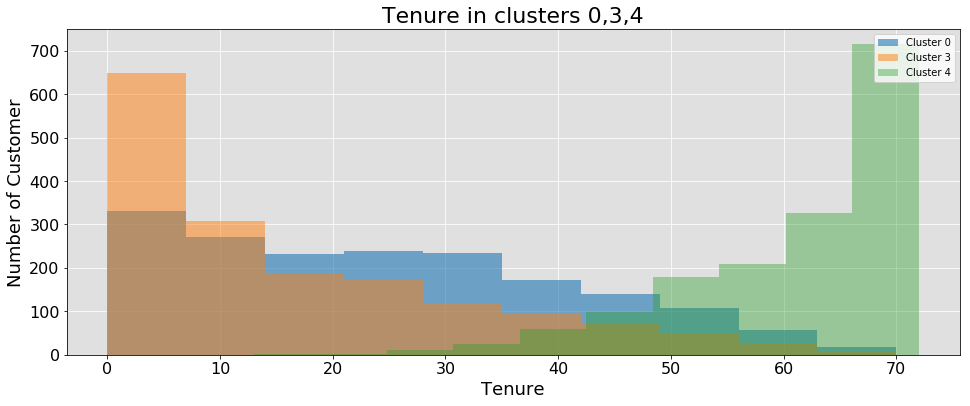

In [72]:
f = plt.figure(figsize=(16,6))
ax = f.add_subplot(1,1,1)

ax.hist(dati[dataset['label']==0]['tenure'], alpha=0.6, label='Cluster 0')
ax.hist(dati[dataset['label']==3]['tenure'], alpha=0.5, label='Cluster 3')
ax.hist(dati[dataset['label']==4]['tenure'], alpha=0.4, label='Cluster 4')

plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(fontsize=10, ncol=1, loc='upper right')
plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')

plt.title('Tenure in clusters 0,3,4', fontsize=22)
plt.ylabel('Number of Customer',fontsize=18)
plt.xlabel('Tenure',fontsize=18)

plt.savefig(plots_dir+'TENUREDISTRIBUTIONINCL03.png')
plt.show()

In [73]:
dati.TotalCharges = dati.TotalCharges.replace(' ',np.nan)
dati.TotalCharges=dati.TotalCharges.astype(float)

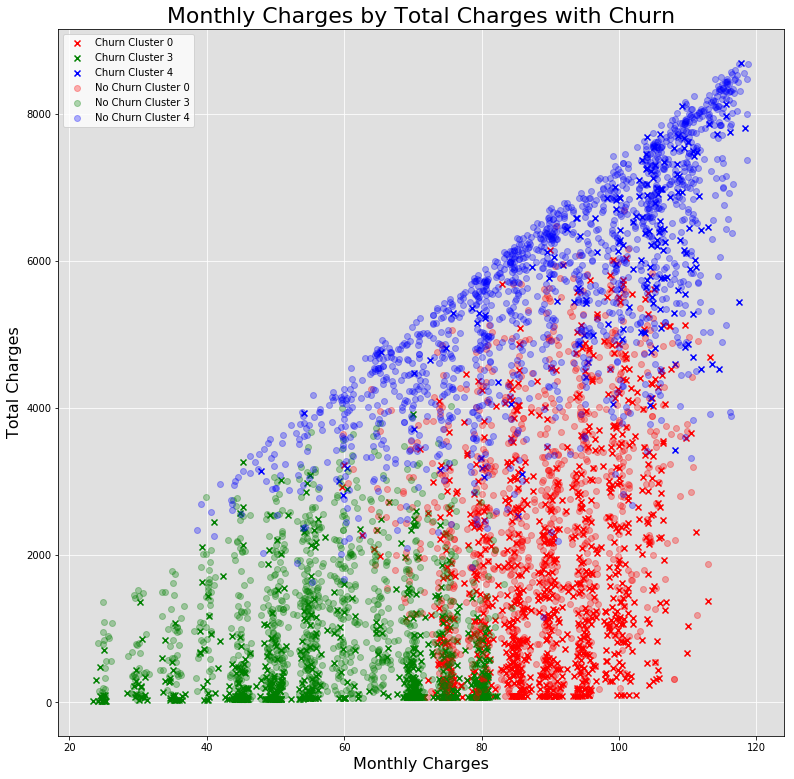

In [76]:
f = plt.figure(figsize=(13,13))
ax = f.add_subplot(1,1,1)

churn=dati[dati.Churn=='Yes']
Nochurn=dati[dati.Churn=='No']
dataset['Churn']=target

ax.scatter(churn[dataset[dataset.Churn=='Yes'].label==0]['MonthlyCharges'].values,churn[dataset[dataset.Churn=='Yes'].label==0].TotalCharges,
           c='r',marker='x',label='Churn Cluster 0')
ax.scatter(churn[dataset[dataset.Churn=='Yes'].label==3]['MonthlyCharges'].values,churn[dataset[dataset.Churn=='Yes'].label==3].TotalCharges,
           c='green',marker='x',label='Churn Cluster 3')
ax.scatter(churn[dataset[dataset.Churn=='Yes'].label==4]['MonthlyCharges'].values,churn[dataset[dataset.Churn=='Yes'].label==4].TotalCharges,
           c='blue',marker='x',label='Churn Cluster 4')

ax.scatter(Nochurn[dataset[dataset.Churn=='No'].label==0]['MonthlyCharges'].values,Nochurn[dataset[dataset.Churn=='No'].label==0].TotalCharges,
           c='r',alpha=0.3,label='No Churn Cluster 0')
ax.scatter(Nochurn[dataset[dataset.Churn=='No'].label==3]['MonthlyCharges'].values,Nochurn[dataset[dataset.Churn=='No'].label==3].TotalCharges,
           c='green',alpha=0.3,label='No Churn Cluster 3')
ax.scatter(Nochurn[dataset[dataset.Churn=='No'].label==4]['MonthlyCharges'].values,Nochurn[dataset[dataset.Churn=='No'].label==4].TotalCharges,
           c='blue',alpha=0.3,label='No Churn Cluster 4')




plt.ylabel('Total Charges',fontsize=16)
plt.xlabel('Monthly Charges',fontsize=16)
plt.title('Monthly Charges by Total Charges with Churn',fontsize=22)
plt.grid(color='w')

ax.set_facecolor('#E0E0E0')
ax.set_axisbelow(True)
plt.legend(fontsize=10, ncol=1, loc='upper left')

plt.savefig(plots_dir+'MONTHLYCHARGESBYTOTALCHARGESINCL034.png')

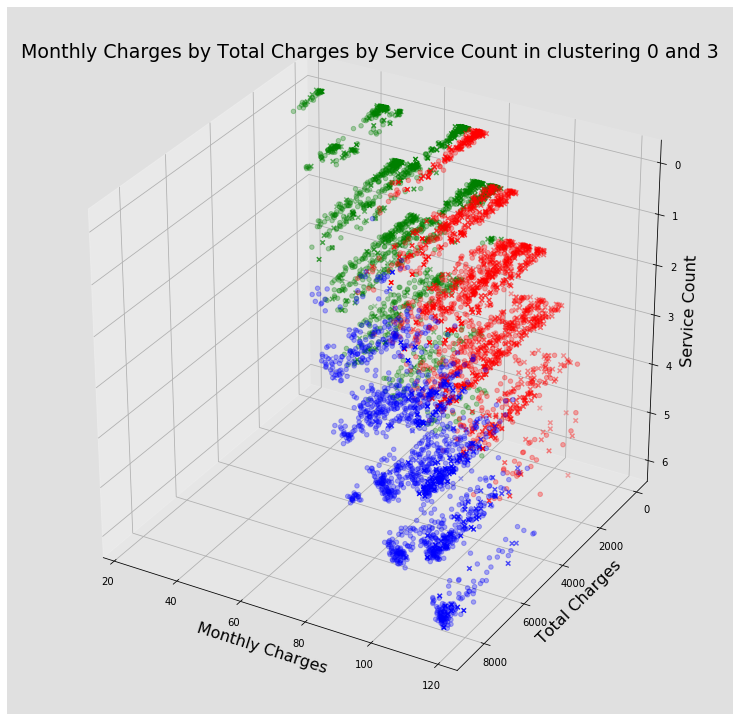

In [78]:
f = plt.figure(figsize=(13,13))
ax = f.add_subplot(1,1,1, projection='3d')
ax.invert_yaxis()
ax.invert_zaxis()

churn=dati[dati.Churn=='Yes']
Nochurn=dati[dati.Churn=='No']
dataset['Churn']=target

ax.scatter(churn[dataset[dataset.Churn=='Yes'].label==0]['MonthlyCharges'].values,churn[dataset[dataset.Churn=='Yes'].label==0].TotalCharges,
           churn[dataset[dataset.Churn=='Yes'].label==0].ServiceCount,
           c='r',marker='x')
ax.scatter(churn[dataset[dataset.Churn=='Yes'].label==3]['MonthlyCharges'].values,churn[dataset[dataset.Churn=='Yes'].label==3].TotalCharges,
           churn[dataset[dataset.Churn=='Yes'].label==3].ServiceCount,
           c='green',marker='x')
ax.scatter(churn[dataset[dataset.Churn=='Yes'].label==4]['MonthlyCharges'].values,churn[dataset[dataset.Churn=='Yes'].label==4].TotalCharges,
           churn[dataset[dataset.Churn=='Yes'].label==4].ServiceCount,
           c='blue',marker='x')

ax.scatter(Nochurn[dataset[dataset.Churn=='No'].label==0]['MonthlyCharges'].values,Nochurn[dataset[dataset.Churn=='No'].label==0].TotalCharges,
           Nochurn[dataset[dataset.Churn=='No'].label==0].ServiceCount,
           c='r',alpha=0.3)
ax.scatter(Nochurn[dataset[dataset.Churn=='No'].label==3]['MonthlyCharges'].values,Nochurn[dataset[dataset.Churn=='No'].label==3].TotalCharges,
           Nochurn[dataset[dataset.Churn=='No'].label==3].ServiceCount,
           c='green',alpha=0.3)
ax.scatter(Nochurn[dataset[dataset.Churn=='No'].label==4]['MonthlyCharges'].values,Nochurn[dataset[dataset.Churn=='No'].label==4].TotalCharges,
           Nochurn[dataset[dataset.Churn=='No'].label==4].ServiceCount,
           c='blue',alpha=0.3)

plt.title('Monthly Charges by Total Charges by Service Count in clustering 0 and 3',fontsize=19)
plt.grid(color='w')

ax.set_xlabel('Monthly Charges',fontsize=16)
ax.set_ylabel('Total Charges',fontsize=16)
ax.set_zlabel('Service Count',fontsize=16)

ax.set_facecolor('#E0E0E0')
ax.set_axisbelow(True)

plt.savefig(plots_dir+'MONTHLYCHARGESBYTOTALCHARGESBYSERVICECOUNTINCL03.png')

C:\Users\Coss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Coss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Coss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\Coss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Coss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Coss\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.p

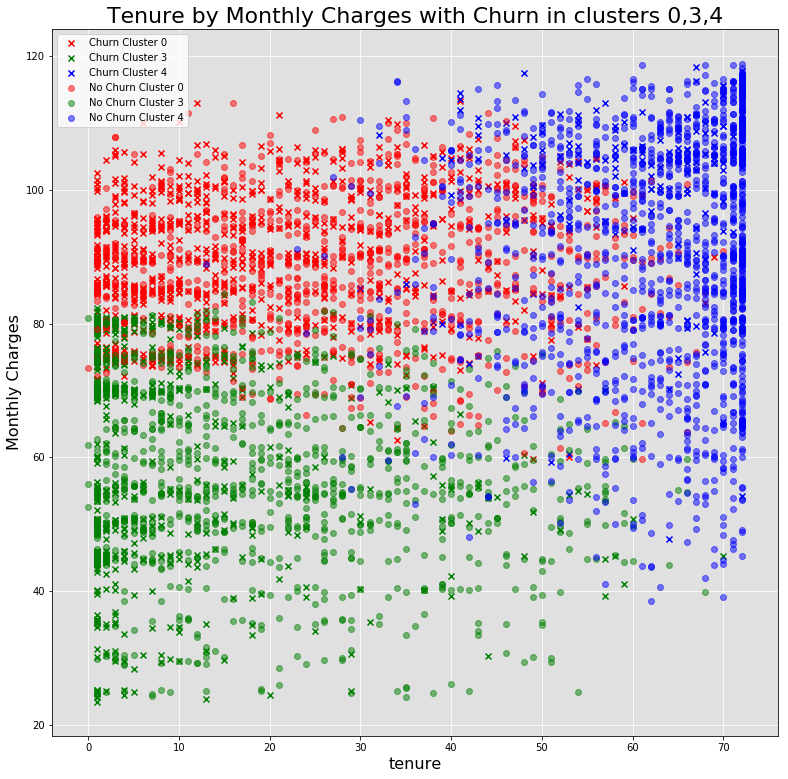

In [81]:
churn=dati[dati.Churn=='Yes']
Nochurn=dati[dati.Churn=='No']
dataset['Churn']=target

f = plt.figure(figsize=(13,13))
ax = f.add_subplot(1,1,1)

ax.scatter(churn[dataset.label==0]['tenure'].values,churn[dataset.label==0].MonthlyCharges,
           c='r',marker='x',label='Churn Cluster 0')
ax.scatter(churn[dataset.label==3]['tenure'].values,churn[dataset.label==3].MonthlyCharges,
           c='green',marker='x',label='Churn Cluster 3')

ax.scatter(churn[dataset.label==4]['tenure'].values,churn[dataset.label==4].MonthlyCharges,
           c='b',marker='x',label='Churn Cluster 4')


ax.scatter(Nochurn[dataset.label==0]['tenure'].values,Nochurn[dataset.label==0].MonthlyCharges,
           c='r',alpha=0.5,label='No Churn Cluster 0')
ax.scatter(Nochurn[dataset.label==3]['tenure'].values,Nochurn[dataset.label==3].MonthlyCharges,
           c='green',alpha=0.5,label='No Churn Cluster 3')

ax.scatter(Nochurn[dataset.label==4]['tenure'].values,Nochurn[dataset.label==4].MonthlyCharges,
           c='b',alpha=0.5,label='No Churn Cluster 4')

plt.ylabel('Monthly Charges',fontsize=16)
plt.xlabel('tenure',fontsize=16)
plt.title('Tenure by Monthly Charges with Churn in clusters 0,3,4',fontsize=22)
plt.grid(color='w')
plt.legend(fontsize=10, ncol=1, loc='upper left')
ax.set_facecolor('#E0E0E0')
ax.set_axisbelow(True)

plt.savefig(plots_dir+'TenurebyMonthlyChargeswithChurninclusters034.png')

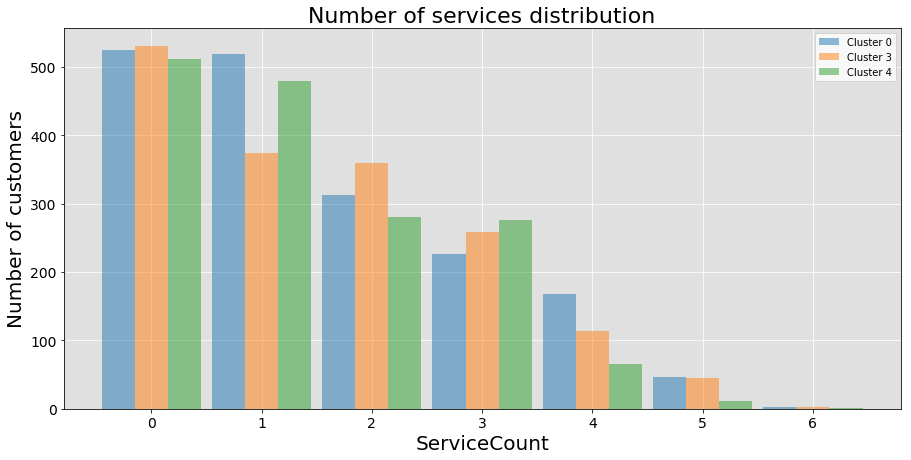

In [83]:
f = plt.figure(figsize=(15,7))
ax = f.add_subplot(1,1,1)

ax.bar(np.arange(7)-0.3,dati[dataset['label']==0]['ServiceCount'].value_counts(dropna=False).values,width=0.3,
       alpha=0.5, label='Cluster 0')
ax.bar(np.arange(7),dati[dataset['label']==3]['ServiceCount'].value_counts(dropna=False).values,width=0.3,
       alpha=0.5, label='Cluster 3')
ax.bar(np.arange(7)+0.3,dati[dataset['label']==4]['ServiceCount'].value_counts(dropna=False).values,width=0.3,
       alpha=0.5, label='Cluster 4')

plt.ylabel('Number of customers',fontsize=20)
plt.xlabel('ServiceCount',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Number of services distribution', fontsize=22)
plt.legend(loc='upper right')

plt.savefig(plots_dir+'ServiceCountDistcl03.png')

In [92]:
dataset.to_csv('salvataggioCluster.csv')

In [103]:
dati[dataset['label']==0]['InternetService'].value_counts(dropna=False)

Fiber optic    1692
DSL             108
Name: InternetService, dtype: int64

In [105]:
dati[dataset['label']==3]['InternetService'].value_counts(dropna=False)

DSL            1260
Fiber optic     420
No                3
Name: InternetService, dtype: int64

In [107]:
dati[dataset['label']==4]['InternetService'].value_counts(dropna=False)

Fiber optic    937
DSL            689
Name: InternetService, dtype: int64

In [104]:
dati[dataset['label']==0]['MultipleLines'].value_counts(dropna=False)

Yes    1286
No      514
Name: MultipleLines, dtype: int64

In [108]:
dati[dataset['label']==3]['MultipleLines'].value_counts(dropna=False)

No                  1145
No phone service     374
Yes                  164
Name: MultipleLines, dtype: int64

In [109]:
dati[dataset['label']==4]['MultipleLines'].value_counts(dropna=False)

Yes                 1142
No                   347
No phone service     137
Name: MultipleLines, dtype: int64

In [139]:
line1=pd.DataFrame([['No', 'No', '24', 'No',
       'Month-to-Month', 'Yes', 'Electronic check', 88,
       '2', 'Multiple lines', 0, 'No', 0]],
        columns=['SeniorCitizen', 'Dependents', 'tenure', 'InternetService',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'ServiceCount', 'PhoneService', 'label', 'Churn', 'label7'])

In [140]:
line2=pd.DataFrame([['No', 'No', '61', 'No',
       'Two year', 'Yes', 'Credit card (automatic)', '90',
       '4', 'Multiple lines', 4, 'No', 4]],
        columns=['SeniorCitizen', 'Dependents', 'tenure', 'InternetService',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'ServiceCount', 'PhoneService', 'label', 'Churn', 'label7'])

In [141]:
line3=pd.DataFrame([['No', 'No', '24', 'No',
       'Month-to-Month', 'Yes', 'Electronic check', 88,
       '2', 'No Phone Service', 0, 'No', 0]],
        columns=['SeniorCitizen', 'Dependents', 'tenure', 'InternetService',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'ServiceCount', 'PhoneService', 'label', 'Churn', 'label7'])

In [148]:
lines=line1.append(line2).append(line3)

In [150]:
plotdf=dataset.append(lines)

In [160]:
plotdf=plotdf.reset_index()

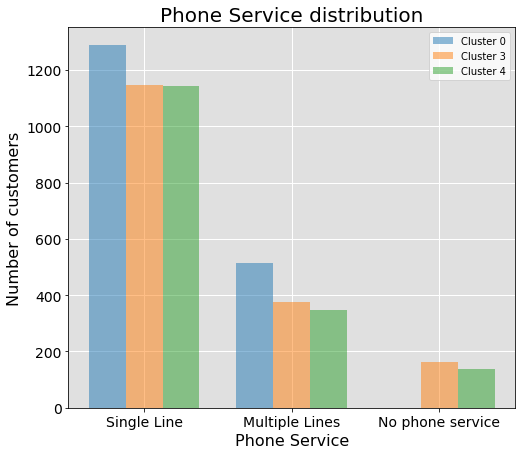

In [201]:
f = plt.figure(figsize=(8,7))
ax = f.add_subplot(1,1,1)
width=0.25
index=np.arange(3)
plt.bar(index-width,
        plotdf[plotdf['label']==0]['PhoneService'].value_counts(dropna=False).values,width=0.25,
       alpha=0.5, label='Cluster 0')
plt.bar(index,
        plotdf[plotdf['label']==3]['PhoneService'].value_counts(dropna=False).values,width=0.25,
       alpha=0.5, label='Cluster 3')
plt.bar(index+width,
        plotdf[plotdf['label']==4]['PhoneService'].value_counts(dropna=False).values,width=0.25,
       alpha=0.5, label='Cluster 4')

plt.ylabel('Number of customers',fontsize=16)
plt.xlabel('Phone Service',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(index,['Single Line','Multiple Lines','No phone service'],fontsize=14)
plt.grid(color='r', linestyle='-', linewidth=1)
ax.set_axisbelow(True)
plt.grid(color='w', linewidth=1)
ax.set_facecolor('#E0E0E0')
ax.set_axisbelow(True)
plt.legend(loc='upper right')

plt.title('Phone Service distribution',fontsize=20)
plt.savefig(plots_dir+'PhoneServiceDistcl03.png')

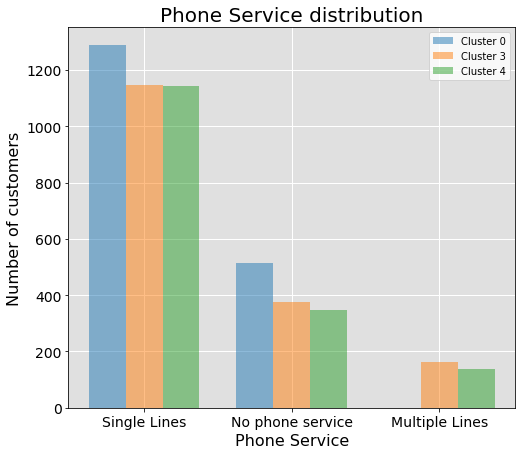

In [202]:
f = plt.figure(figsize=(8,7))
ax = f.add_subplot(1,1,1)

width=0.25
index=np.arange(3)

plt.bar(index-width,
        plotdf[plotdf['label']==0]['PhoneService'].value_counts(dropna=False).values,width=0.25,
       alpha=0.5, label='Cluster 0')
plt.bar(index,
        plotdf[plotdf['label']==3]['PhoneService'].value_counts(dropna=False).values,width=0.25,
       alpha=0.5, label='Cluster 3')
plt.bar(index+width,
        plotdf[plotdf['label']==4]['PhoneService'].value_counts(dropna=False).values,width=0.25,
       alpha=0.5, label='Cluster 4')


plt.ylabel('Number of customers',fontsize=16)
plt.xlabel('Phone Service',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(index,['Single Lines','No phone service','Multiple Lines'],fontsize=14)
plt.grid(color='r', linestyle='-', linewidth=1)
ax.set_axisbelow(True)
plt.grid(color='w', linewidth=1)
ax.set_facecolor('#E0E0E0')
ax.set_axisbelow(True)
plt.legend(loc='upper right')

plt.title('Phone Service distribution',fontsize=20)
plt.savefig(plots_dir+'PhoneServiceDistcl03.png')

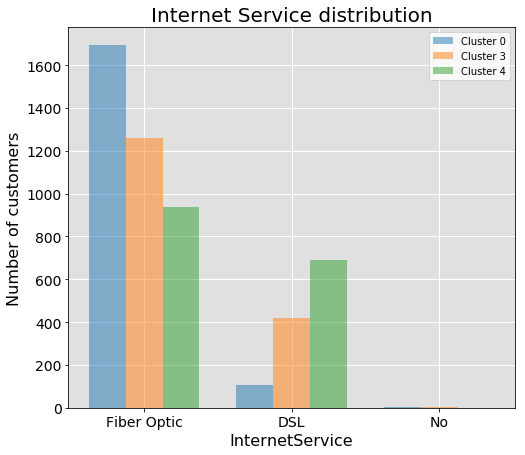

In [196]:
f = plt.figure(figsize=(8,7))
ax = f.add_subplot(1,1,1)

index=np.arange(3)
width=0.25

plt.bar(index-width,plotdf[plotdf['label']==0]['InternetService'].value_counts(dropna=False).values,width=0.25,
       alpha=0.5, label='Cluster 0')
plt.bar(index,plotdf[plotdf['label']==3]['InternetService'].value_counts(dropna=False).values,width=0.25,
       alpha=0.5, label='Cluster 3')
plt.bar(index+width,plotdf[plotdf['label']==4]['InternetService'].value_counts(dropna=False).values,width=0.25,
       alpha=0.5, label='Cluster 4')



plt.ylabel('Number of customers',fontsize=16)
plt.xlabel('InternetService',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(index,['Fiber Optic','DSL','No'],fontsize=14)
plt.grid(color='w', linewidth=1)
ax.set_facecolor('#E0E0E0')
ax.set_axisbelow(True)
plt.legend(loc='upper right')

plt.title('Internet Service distribution',fontsize=20)
plt.savefig('InternetServiceDistcl03.png')